In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
DataSet = pd.read_csv('heart.csv')

DataSet.rename(columns =
{
    'age': 'Age', 'sex':'Sex', 'cp':'PainType', 'trestbps':'RBloodPressure',
                          
    'chol':'SCholesterol', 'fbs':'FBSugar', 'restecg':'REGraphicResult',
                          
    'thalach': 'MaxHeartRateAchieved', 'exang':'ExertionalAngina',
                          
    'oldpeak':'OldPeakDepression', 'slope':'SlopeOfSTSegment',
                          
    'ca':'MajorVessels', 'thal':'Thalassemia',
    
    'target':'Target'

}, inplace = True)

In [19]:
DataSet.head()

,Age,Sex,PainType,RBloodPressure,SCholesterol,FBSugar,REGraphicResult,MaxHeartRateAchieved,ExertionalAngina,OldPeakDepression,SlopeOfSTSegment,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
DataSet.isnull().sum()

Age                     0
Sex                     0
PainType                0
RBloodPressure          0
SCholesterol            0
FBSugar                 0
REGraphicResult         0
MaxHeartRateAchieved    0
ExertionalAngina        0
OldPeakDepression       0
SlopeOfSTSegment        0
MajorVessels            0
Thalassemia             0
Target                  0
dtype: int64

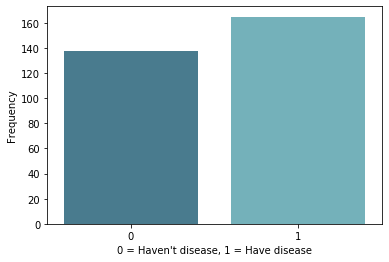

In [25]:
sns.countplot(DataSet['Target'], label = "Sum", palette = 'GnBu_d')

plt.xlabel("0 = Haven't disease, 1 = Have disease")

plt.ylabel("Frequency")

plt.show()

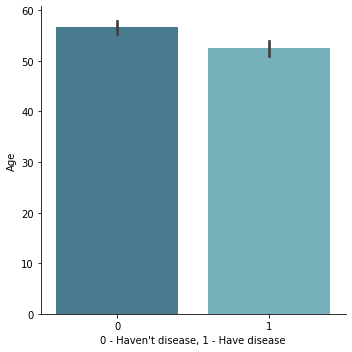

In [26]:
sns.catplot(x = 'Target', y = 'Age', kind = 'bar', data = DataSet, legend = False, palette = 'GnBu_d')

plt.xlabel("0 - Haven't disease, 1 - Have disease")

plt.ylabel('Age')

plt.show()

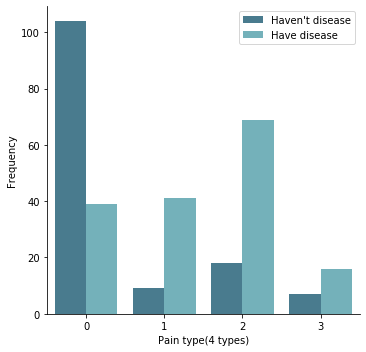

In [27]:
sns.catplot(x = 'PainType', kind = 'count', hue = 'Target', data = DataSet, legend = False, palette = 'GnBu_d')

plt.xlabel('Pain type(4 types)')

plt.ylabel('Frequency')

plt.legend(["Haven't disease", "Have disease"])

plt.show()

In [28]:
X = DataSet.drop(['Target'], axis = 1)

Y = DataSet['Target']

In [29]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [30]:
XTrain.shape

(212, 13)

In [31]:
KFoldSplit = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

ScoringMetrics = ['precision_macro', 'recall_macro' , 'f1_weighted']

def CrossValidationFunction(Model):

    SelectedModel = Model

    ScoresResults = cross_validate(SelectedModel, XTrain, YTrain, scoring = ScoringMetrics, cv = KFoldSplit)

    sorted(ScoresResults.keys())

    SelectedModelTime = ScoresResults['fit_time'].mean()

    SelectedModelPrecision = ScoresResults['test_precision_macro'].mean()

    SelectedModelRecall = ScoresResults['test_recall_macro'].mean()

    SelectedModelF1Score = ScoresResults['test_f1_weighted'].mean()
 
    return np.array([SelectedModelTime, SelectedModelPrecision, SelectedModelRecall, SelectedModelF1Score])

In [32]:
DecisionTreeClassifierRow = CrossValidationFunction(DecisionTreeClassifier())

RandomForestClassifierRow = CrossValidationFunction(RandomForestClassifier())

ExtraTreesClassifierRow = CrossValidationFunction(ExtraTreesClassifier())

AdaBoostClassifierRow = CrossValidationFunction(AdaBoostClassifier())

GradientBoostingClassifierRow = CrossValidationFunction(GradientBoostingClassifier())

ComparisonOfModels = pd.DataFrame([DecisionTreeClassifierRow, RandomForestClassifierRow,
                                   
ExtraTreesClassifierRow, AdaBoostClassifierRow, GradientBoostingClassifierRow])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [33]:
NameOfModels = pd.Series(['Decision Tree', 'Random Forest', 'Extra Trees', 
                                                 
'AdaBoost', 'XGBoost'])

ComparisonOfModels.insert(loc = 0, column = 'Model', value = NameOfModels)

ComparisonOfModels.rename(columns = {0: "Fitting time", 1: "Precision", 2: "Recall", 3: "F score"}, inplace = True)

In [34]:
ComparisonOfModels.head()

,Model,Fitting time,Precision,Recall,F score
0,Decision Tree,0.003827,0.734547,0.728817,0.734290
1,Random Forest,0.015595,0.767288,0.768033,0.768556
2,Extra Trees,0.011704,0.774986,0.776659,0.774425
3,AdaBoost,0.062165,0.778630,0.764636,0.770574
4,XGBoost,0.065554,0.790598,0.787440,0.791750


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


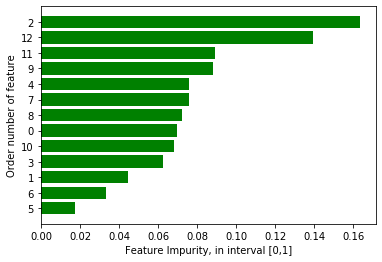

In [35]:
BestModel = ExtraTreesClassifier()

BestModel.fit(XTrain, YTrain)

Importances = BestModel.feature_importances_

Indices = np.argsort(Importances)

plt.xlabel("Feature Impurity, in interval [0,1]")

plt.ylabel("Order number of feature")

plt.barh(range(X.shape[1]), Importances[Indices], color = "g", align = "center")

plt.yticks(range(X.shape[1]), Indices)

plt.ylim([-1, X.shape[1]])

plt.show()

In [36]:
YPredictedTrain = BestModel.predict(XTrain)

print("By Train Set: -----------------------------------------\n", classification_report(YTrain, YPredictedTrain))

YPredictedTest = BestModel.predict(XTest)

print("\n")

print("By Test Set: -----------------------------------------\n" ,classification_report(YTest, YPredictedTest))

By Train Set: -----------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



By Test Set: -----------------------------------------
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.78      0.81      0.79        47

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [37]:
NumberOfTreesInForest = [600, 700, 800]

QualityOfSplit = ["gini", "entropy"]

MaximumDepthOfTree = [6, 7, 8]

GridExternalParameters = dict(n_estimators = NumberOfTreesInForest, criterion = QualityOfSplit, max_depth = MaximumDepthOfTree)

GridKFoldSplit = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

GridSearch = GridSearchCV(BestModel, GridExternalParameters, scoring = "f1", cv = GridKFoldSplit, verbose = 4, n_jobs =-1)

GridSearch.fit(XTrain, YTrain)

YPredictedTrainGrid = GridSearch.predict(XTrain)

print("Grid Search By Train Set: -----------------------------------------\n", classification_report(YTrain, YPredictedTrainGrid))

YPredictedTestGrid = GridSearch.predict(XTest)

print("\n")

print("Grid Search By Test Set: -----------------------------------------\n" ,classification_report(YTest, YPredictedTestGrid))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   37.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid Search By Train Set: -----------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        94
           1       0.98      1.00      0.99       118

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



Grid Search By Test Set: -----------------------------------------
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [38]:
GridSearch.best_score_

0.8674695018949754

In [39]:
GridSearch.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 600}

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


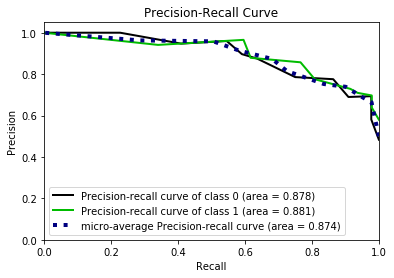

In [40]:
YPredictProbability = BestModel.predict_proba(XTest)

import scikitplot as skplt

skplt.metrics.plot_precision_recall_curve(YTest, YPredictProbability)

In [41]:
from sklearn.tree import plot_tree

plot_tree(ExampleModel)

NameError: name 'ExampleModel' is not defined

In [ ]:
from sklearn.tree import export_graphviz

ExampleModel = DecisionTreeClassifier()

ExampleModel.fit(XTrain, YTrain)

export_graphviz(ExampleModel, out_file = 'tree.dot', feature_names = XTrain.columns, class_names = None,

label = 'all', filled = True, impurity = True, node_ids = True, proportion = True, rotate = True)